In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X=data["Income"]
Y=data["SpendingScore"]

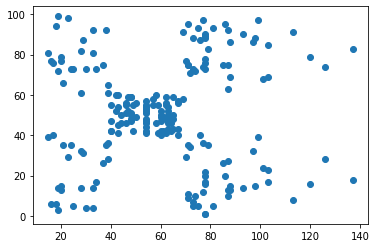

In [8]:
plt.scatter(X,Y)
plt.show()

In [14]:
X=data.iloc[:,[3,4]].values

In [15]:
km=KMeans(n_clusters=3)
y_Kmeans=km.fit_predict(X)

In [16]:
y_Kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

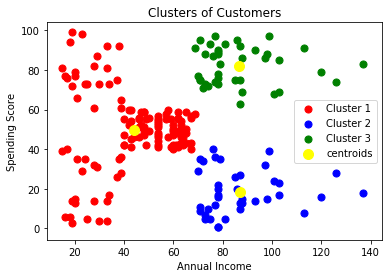

In [17]:
#in y_Kmeans==0,0 the first one is the class 0 and second one is the column index i.e income.
plt.scatter(X[y_Kmeans==0,0],X[y_Kmeans==0,1],s=50,c="red",label='Cluster 1')
plt.scatter(X[y_Kmeans==1,0],X[y_Kmeans==1,1],s=50,c="blue",label='Cluster 2')
plt.scatter(X[y_Kmeans==2,0],X[y_Kmeans==2,1],s=50,c="green",label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c="yellow",label="centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


Text(0.5, 1.0, 'The Elbow Method')

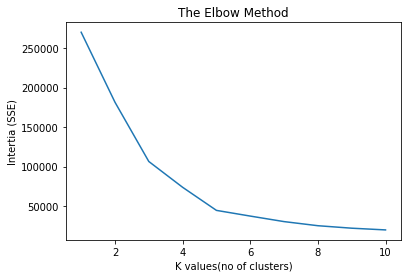

In [18]:
#elbow method to determine the optimal value of K.
x=data.iloc[:,[3,4]].values
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_)
plt.plot(range(1,11),ls)
plt.xlabel("K values(no of clusters)")
plt.ylabel("Intertia (SSE)")
plt.title("The Elbow Method")
    

In [19]:
#in the graph above we observe that , when k=3 there is a sudden decrease in inertia value , and then 
#when k=5,there is a gradual decrease. Thus , we need to choose k before where the gradual decrease 
#begins

#### Hierarchical Clustering

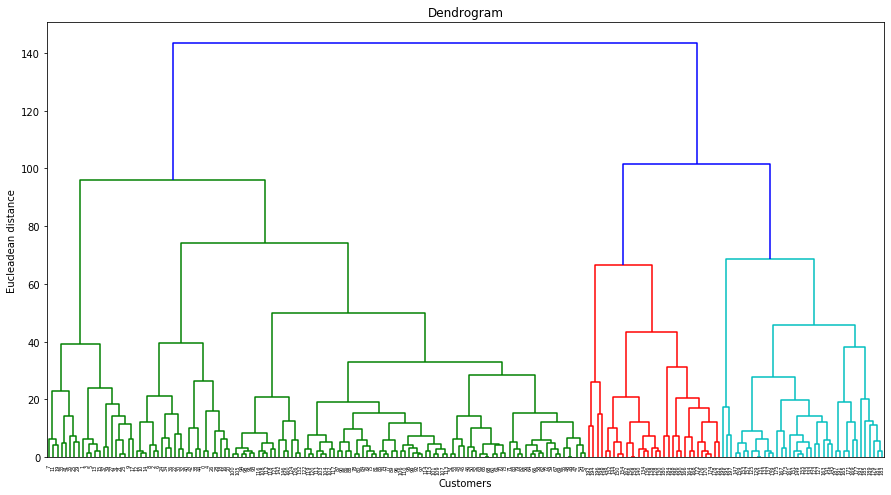

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method="complete"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucleadean distance")
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
y_hc=ac.fit_predict(x)

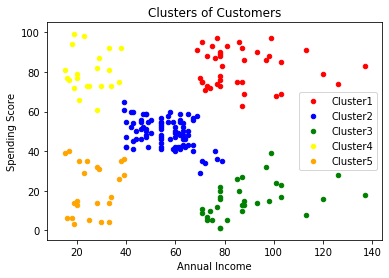

In [28]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=20,c="red",label="Cluster1")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=20,c="blue",label="Cluster2")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=20,c="green",label="Cluster3")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=20,c="yellow",label="Cluster4")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=20,c="orange",label="Cluster5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [52]:
data["output_kmeans"]=y_Kmeans

In [53]:
data.head()

,CustomerID,Genre,Age,Income,SpendingScore,output,output_kmeans
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,0


In [54]:
x=data.iloc[:,2:-2]
y=data.iloc[:,-1]

In [51]:
#classification using Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
adc=AdaBoostClassifier(n_estimators=100,learning_rate=0.9)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
adc.fit(train_x,train_y)
pred=adc.predict(test_x)
cm=confusion_matrix(test_y,pred)
acc=accuracy_score(test_y,pred)
print("confusion matrix")
print(cm)
print("accuracy=",acc)



confusion matrix
[[10  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  6  0]
 [ 0  1  0  0  4]]
accuracy= 0.975


In [58]:
#classification using Kmeans output
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
adc=AdaBoostClassifier(n_estimators=100,learning_rate=0.9)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
adc.fit(train_x,train_y)
pred=adc.predict(test_x)
cm=confusion_matrix(test_y,pred)
acc=accuracy_score(test_y,pred)
print("confusion matrix")
print(cm)
print("accuracy=",acc)


confusion matrix
[[25  1  0]
 [ 0  6  0]
 [ 0  0  8]]
accuracy= 0.975
